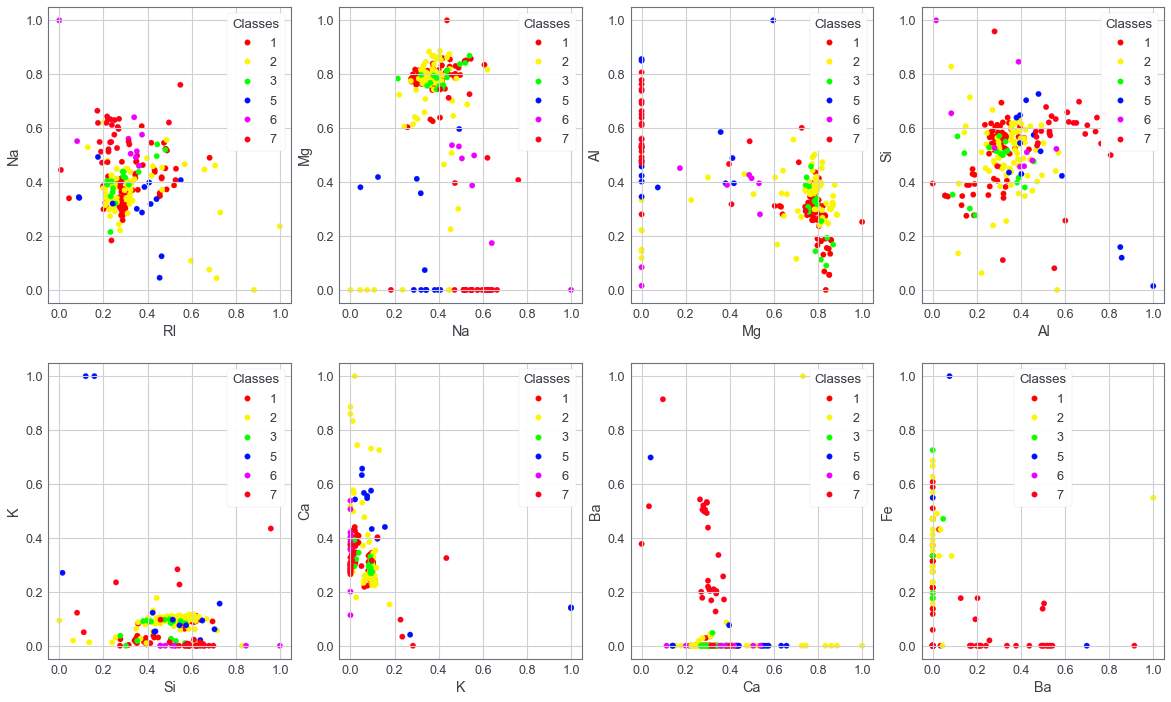

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing

from jupyterthemes import jtplot
jtplot.style('grade3')

df = pd.read_csv('../../../../glass.csv')

var_names = list(df.columns)
labels = df.to_numpy('int')[:,-1]
data = df.to_numpy('float')[:,:-1]

data = preprocessing.minmax_scale(data)

fig, axs = plt.subplots(2,4)
fig.set_figwidth(20)
fig.set_figheight(12)

#print(dir(axs))

for i in range(data.shape[1]-1):
    scatter = axs[i // 4, i % 4].scatter(data[:,i],data[:,(i+1)],
                               c=labels,
                               cmap='hsv')
    axs[i // 4, i % 4].set_xlabel(var_names[i])
    axs[i // 4, i % 4].set_ylabel(var_names[i+1])
    legend1 = axs[i // 4, i % 4].legend(*scatter.legend_elements(),
                                 loc="best", title="Classes")
    axs[i // 4, i % 4].add_artist(legend1)
plt.show()


In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_data = pca.fit(data).transform(data)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
print(pca.singular_values_)

[0.45429569 0.17990097]
[0.45429569 0.63419666]
[5.1049308  3.21245688]


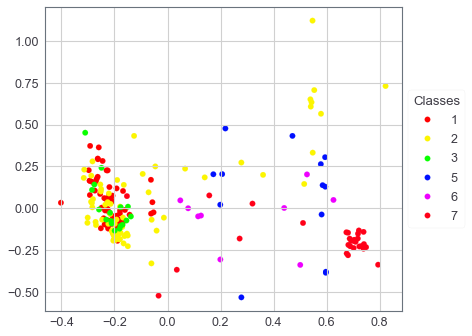

In [19]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='hsv')
plt.legend(*scatter.legend_elements(),loc="center left", title="Classes", bbox_to_anchor=(1, 0.5))
plt.show()

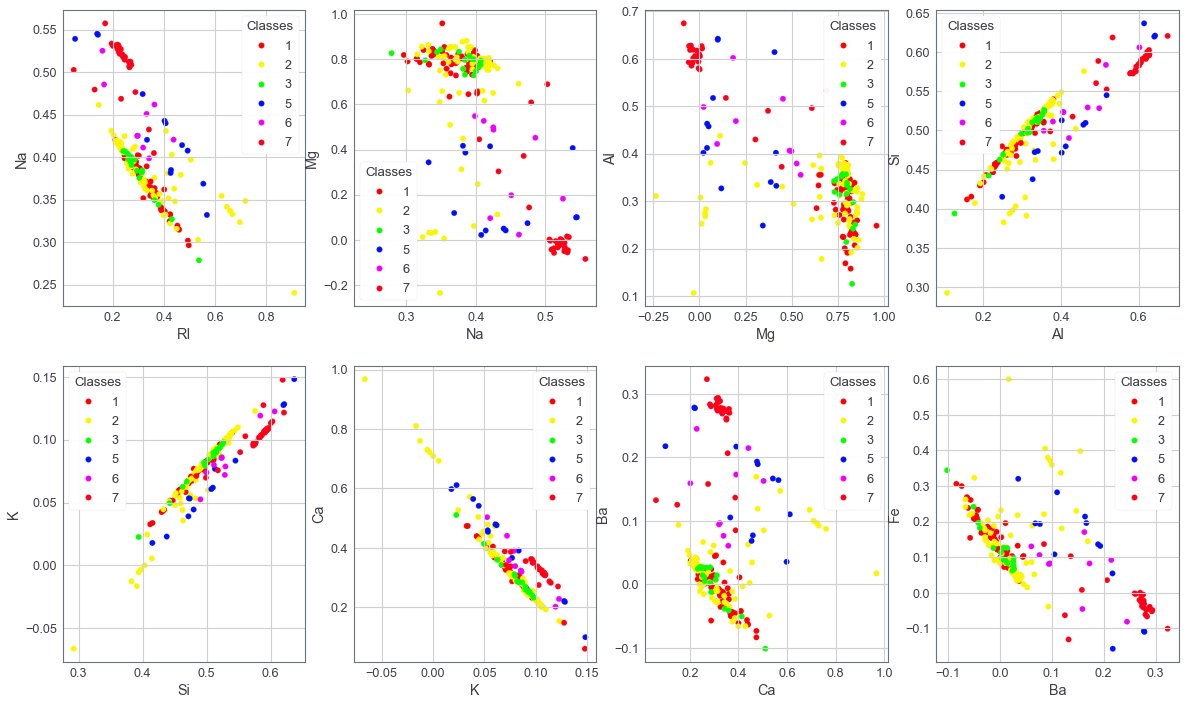

In [6]:
restored_data = pca.inverse_transform(pca_data)
fig, axs = plt.subplots(2,4)
fig.set_figwidth(20)
fig.set_figheight(12)

#print(dir(axs))
for i in range(restored_data.shape[1]-1):
    scatter = axs[i // 4, i % 4].scatter(restored_data[:,i],restored_data[:,(i+1)],
                               c=labels,
                               cmap='hsv')
    axs[i // 4, i % 4].set_xlabel(var_names[i])
    axs[i // 4, i % 4].set_ylabel(var_names[i+1])
    legend1 = axs[i // 4, i % 4].legend(*scatter.legend_elements(),
                                 loc="best", title="Classes")
    axs[i // 4, i % 4].add_artist(legend1)
    

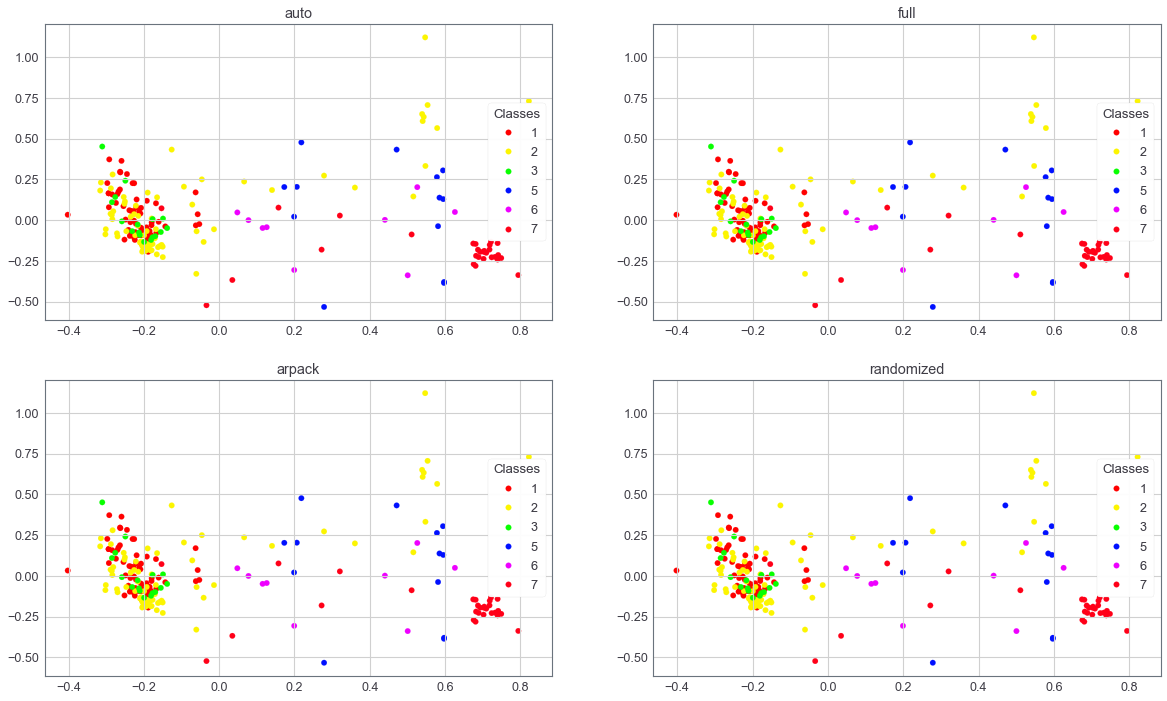

In [7]:
n_comp = 2

ps = []
a = PCA(n_components=n_comp, svd_solver='auto').fit(data).transform(data)
name = "auto"
ps.append([a, name])

a = PCA(n_components=n_comp, svd_solver='full').fit(data).transform(data)
name = "full"
ps.append([a, name])

a = PCA(n_components=n_comp, svd_solver='arpack').fit(data).transform(data)
name = "arpack"
ps.append([a, name])

a = PCA(n_components=n_comp, svd_solver='randomized').fit(data).transform(data)
name = "randomized"
ps.append([a, name])

ps = np.asarray(ps)

fig, axs = plt.subplots(2,2)
fig.set_figwidth(20)
fig.set_figheight(12)
for i in range(4):
    axs[i // 2, i % 2].set_title(ps[i % 4][1])
    scatter_ps = axs[i // 2, i % 2].scatter(ps[i][0][:, 0],ps[i][0][:, 1],
                               c=labels,
                               cmap='hsv')
    legend1 = axs[i // 2, i % 2].legend(*scatter_ps.legend_elements(),
                                 loc="best", title="Classes")
    axs[i // 2, i % 2].add_artist(legend1)

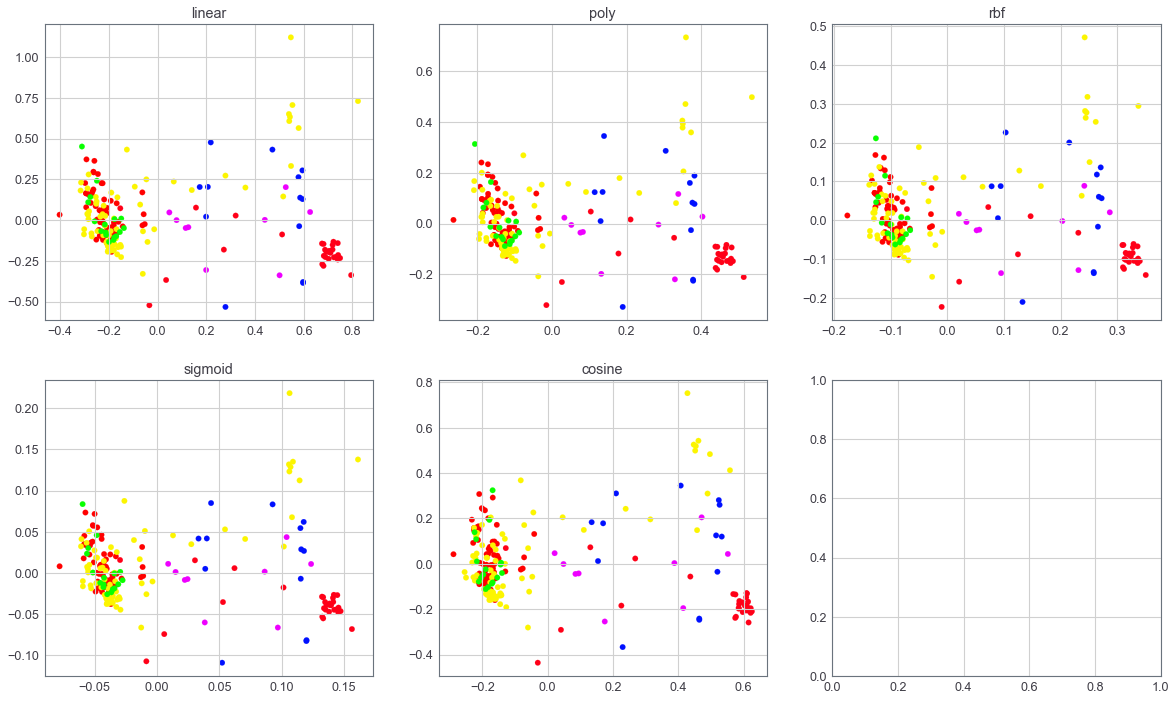

In [20]:
#kernel PCA
from sklearn.decomposition import KernelPCA

#class sklearn.decomposition.KernelPCA(n_components=None, *, kernel='linear',
#                                         gamma=None, degree=3, coef0=1, kernel_params=None,
#                                         alpha=1.0, fit_inverse_transform=False, eigen_solver='auto',
#                                         tol=0, max_iter=None, remove_zero_eig=False,
#                                         random_state=None, copy_X=True, n_jobs=None)

fig, axs = plt.subplots(2,3)
fig.set_figwidth(20)
fig.set_figheight(12)

krns = ['linear', 'poly', 'rbf', 'sigmoid', 'cosine']
for i in range(5):
    kpca = KernelPCA(n_components = 5, kernel=krns[i])
    kpca_data = kpca.fit_transform(data)
    axs[i // 3, i % 3].set_title(krns[i])
    scatter_kpca = axs[i // 3, i % 3].scatter(kpca_data[:, 0],kpca_data[:, 1],
                               c=labels,
                               cmap='hsv')
    #legend1 = axs[i // 3, i % 3].legend(*scatter_kpca.legend_elements(),
    #                             loc="center left", title="Classes", bbox_to_anchor=(1, 0.5))
    #axs[i // 3, i % 3].add_artist(legend1)



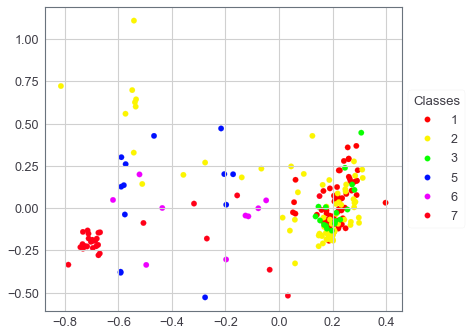

In [72]:
#SparcePCA
#sklearn.decomposition.SparsePCA(n_components=None, *, alpha=1, ridge_alpha=0.01, max_iter=1000, tol=1e-08, method='lars', n_jobs=None, U_init=None, V_init=None, verbose=False, random_state=None, normalize_components='deprecated')
from sklearn.decomposition import SparsePCA

spca = SparsePCA(alpha=0)
spca_data = spca.fit_transform(data)

plt.scatter(spca_data[:,0],spca_data[:,1],c=labels,cmap='hsv')
plt.legend(*scatter.legend_elements(),loc="center left", title="Classes", bbox_to_anchor=(1, 0.5))
plt.show()

[-0.6977236  -1.13515838]


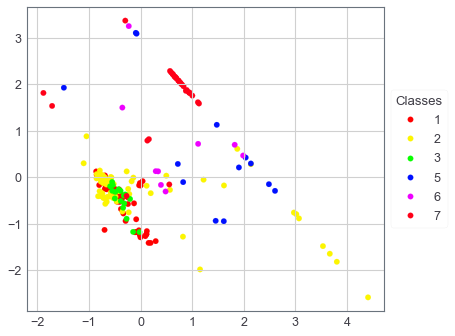

In [89]:
#Факторный анализ
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2)
fa_data = fa.fit_transform(data)

plt.scatter(fa_data[:, 0], fa_data[:, 1],c=labels,cmap='hsv')
plt.legend(*scatter.legend_elements(),loc="center left", title="Classes", bbox_to_anchor=(1, 0.5))
plt.show()